https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

Column Descriptions:¶
*	id (Unique id for each patient)
*	age (Age of the patient in years)
*	origin (place of study)
*	sex (Male/Female)
*	cp chest pain type
  1.	typical angina,
  2.	atypical angina,
  3.	non-anginal,
  4.	asymptomatic
*	trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
*	chol (serum cholesterol in mg/dl)
*	fbs (if fasting blood sugar > 120 mg/dl)
*	restecg (resting electrocardiographic results)
*	-- Values: [normal, stt abnormality, lv hypertrophy]
*	thalach: maximum heart rate achieved
*	exang: exercise-induced angina (True/ False)
*	oldpeak: ST depression induced by exercise relative to rest
*	slope: the slope of the peak exercise ST segment
*	ca: number of major vessels (0-3) colored by fluoroscopy
*	thal: [normal; fixed defect; reversible defect]
*	num: the predicted attribute



________________________________________
Problem Statement
________________________________________
•	Given the dataset of heart disease patients, we need to perform multiclass classification:
 - 	0 = no heart disease
 - 	1 = mild heart disease
 - 	2 = moderate heart disease
 - 	3 = severe heart disease
 -	4 = critical heart disease


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/0.Latest_DS_Course/Ensemble/2.Boosting/heart_disease_uci.csv')

## Data Inspection

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.shape

(920, 16)

In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
#  All columns which types is Object
df.select_dtypes(include='object').columns.tolist()

['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [ ]:
# column are not type of Objects
df.select_dtypes(exclude='object').columns.tolist()

['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

In [ ]:
df.num.value_counts(normalize=True)*100

,proportion
num,
0,44.673913
1,28.804348
2,11.847826
3,11.630435
4,3.043478


<Axes: xlabel='num', ylabel='count'>

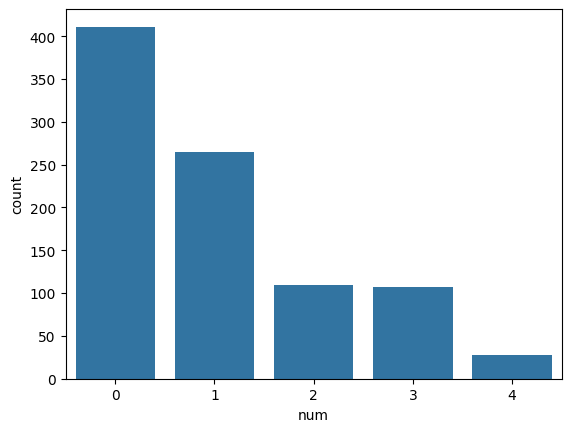

In [ ]:
sns.countplot(data=df, x="num")

##Dealing with missing values



In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [ ]:
#  function to impute the missing values

def impute_categorical_missing_data(passed_col):
    #Split Data into Null and Non-null Subsets:
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()] # good data - no missing value

    #Prepare Feature Data (X) and Target Data (y):
    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    #List of Other Columns with Missing Values:
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    #Label Encoding of Categorical Columns:
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)

    #Iterative Imputation for Other Missing Columns:
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    #Train-Test Split:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Train a Random Forest Regressor:
    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    #Make Predictions and Evaluate Performance:
    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    #Impute Missing Values in Null Rows:
    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    #Impute Missing Values for the Target Column:
    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    #Combine Imputed Data:
    df_combined = pd.concat([df_not_null, df_null])

    #Return the Imputed Column:
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    # print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [ ]:


# impute missing values
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
R2 = 0.05520328228326754 

Missing Values chol : 3.26%
R2 = 0.6758646752308619 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.85 accuracy

Missing Values thalch : 5.98%
R2 = 0.325969627254427 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 82.08 accuracy

Missing Values oldpeak : 6.74%
R2 = 0.40263842175246134 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 69.11 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 62.9 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [ ]:
df.isnull().sum()


,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


##Dealing with Outliers



In [ ]:
# create a function to draw histogram and boxplot of the numeric columns passed to it
def draw_histogram_and_boxplot(passed_col):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.histplot(df[passed_col], kde=True, ax=ax[0])
    sns.boxplot(data=df, x=passed_col, ax=ax[1])
    plt.show()

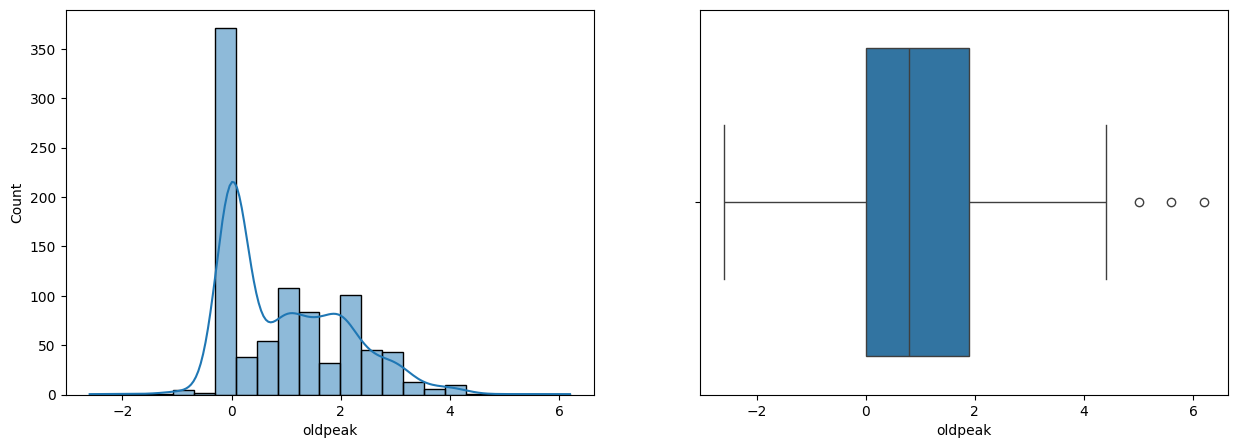

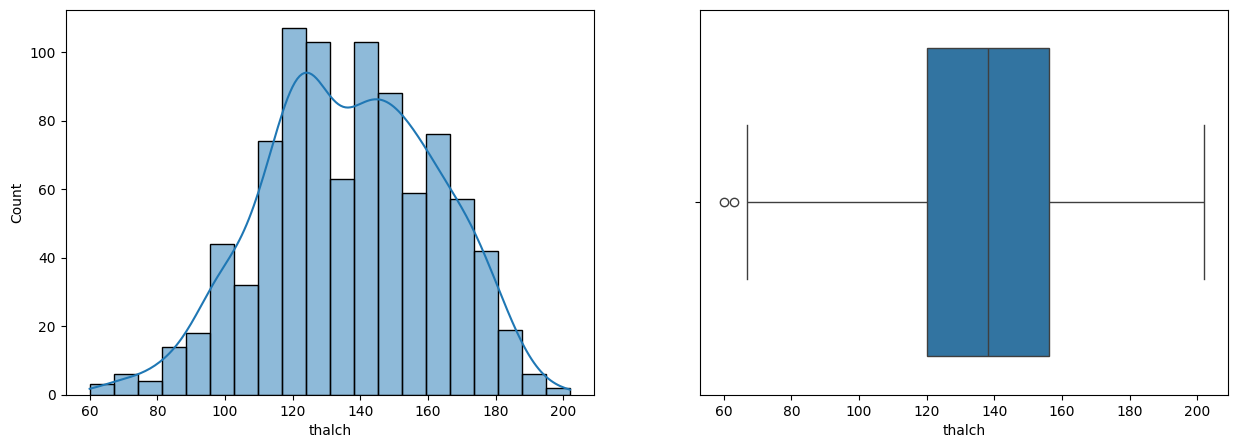

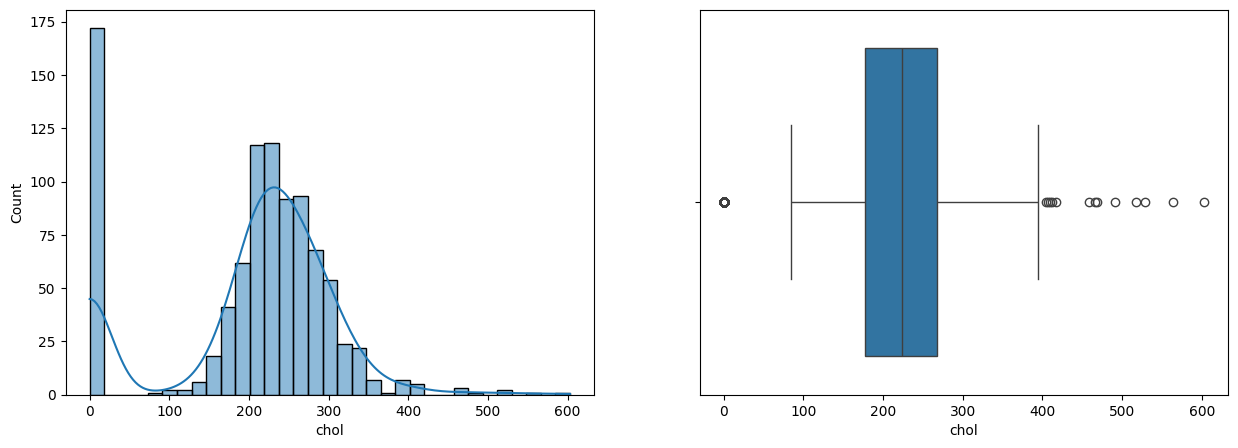

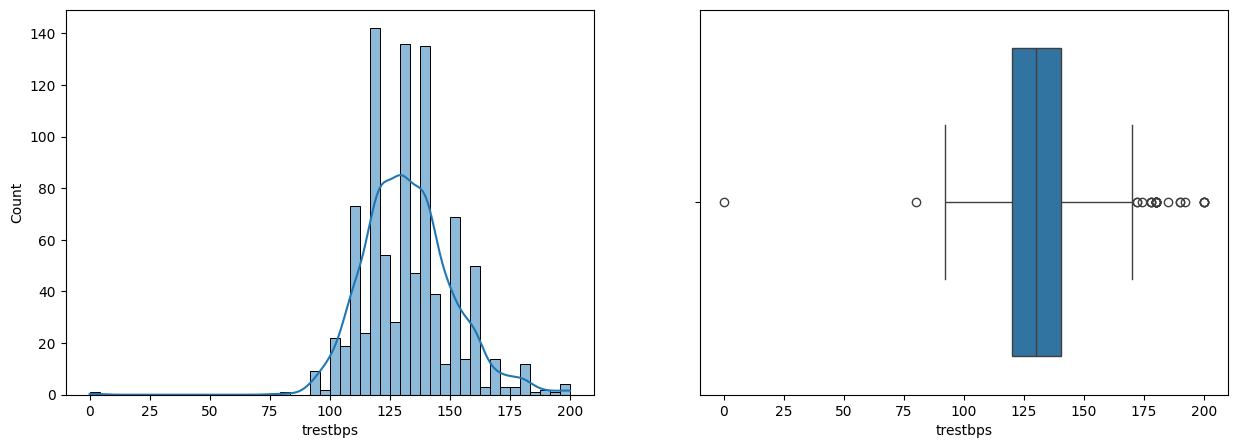

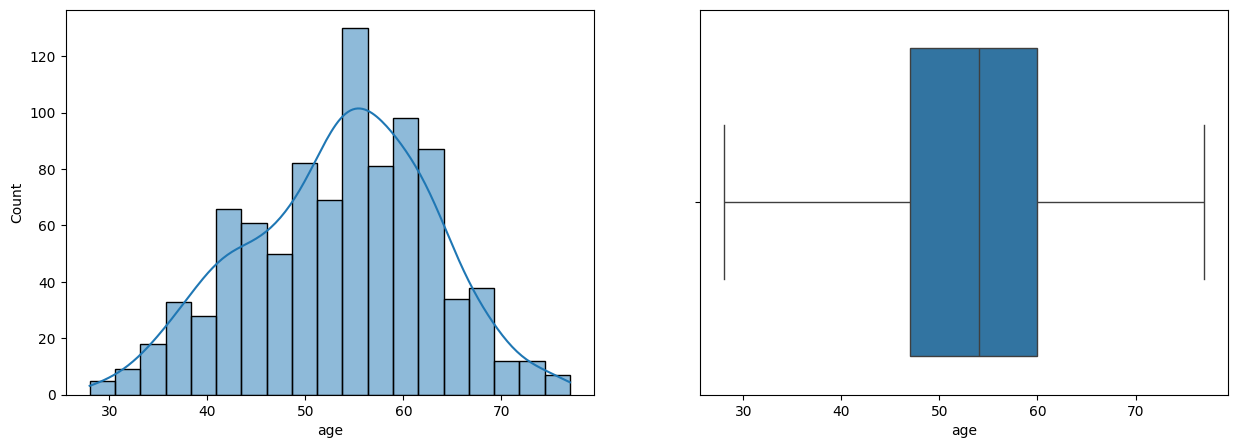

In [ ]:
# call the function for each numeric column
for col in numeric_cols:
    draw_histogram_and_boxplot(col)

In [ ]:
import pandas as pd
from scipy import stats


# Define the columns to check for outliers
columns_to_check = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']

# Calculate Z-scores for the specified columns
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Define a Z-score threshold for outlier detection (you can adjust this threshold)
z_score_threshold = 2.8

# Identify outliers using the threshold
outliers = (z_scores > z_score_threshold).any(axis=1)

# Display the rows containing outliers
print("Rows with outliers:")
print(df[outliers])

# Remove outliers
df = df[~outliers]

# Display the DataFrame without outliers
print("\nDataFrame without outliers:")
print(df.head(5))

Rows with outliers:
      id  age     sex        dataset               cp  trestbps   chol    fbs  \
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
40    41   65  Female      Cleveland     asymptomatic     150.0  225.0  False   
62    63   58    Male      Cleveland     asymptomatic     128.0  216.0  False   
91    92   62  Female      Cleveland     asymptomatic     160.0  164.0  False   
92    93   62    Male      Cleveland      non-anginal     130.0  231.0  False   
104  105   49    Male      Cleveland      non-anginal     120.0  188.0  False   
118  119   63    Male      Cleveland     asymptomatic     130.0  330.0   True   
121  122   63  Female      Cleveland     asymptomatic     150.0  407.0  False   
123  124   55    Male      Cleveland     asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
146  147   57    Male      Cleveland     asymptomatic     165.0  289.0   True   
152  153

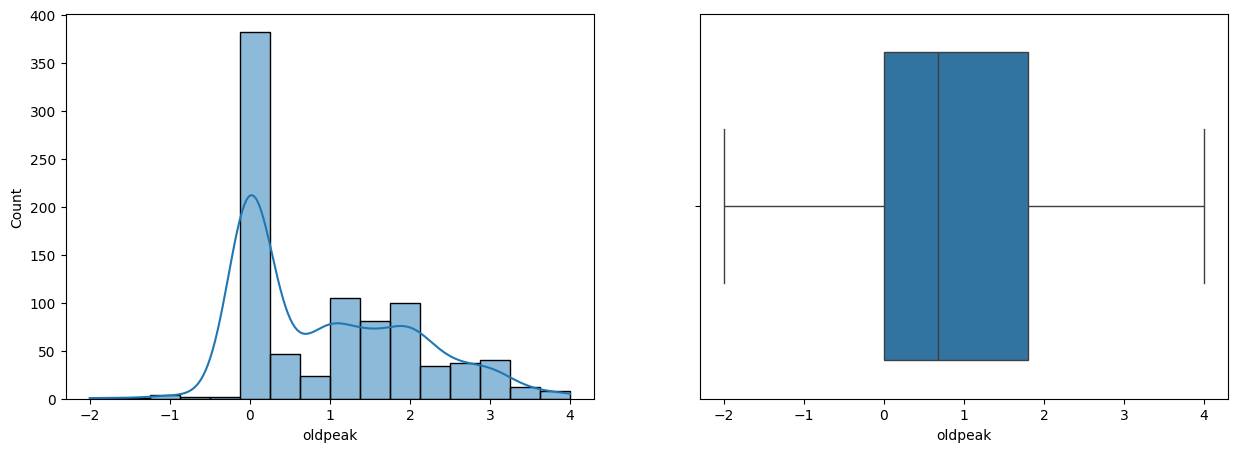

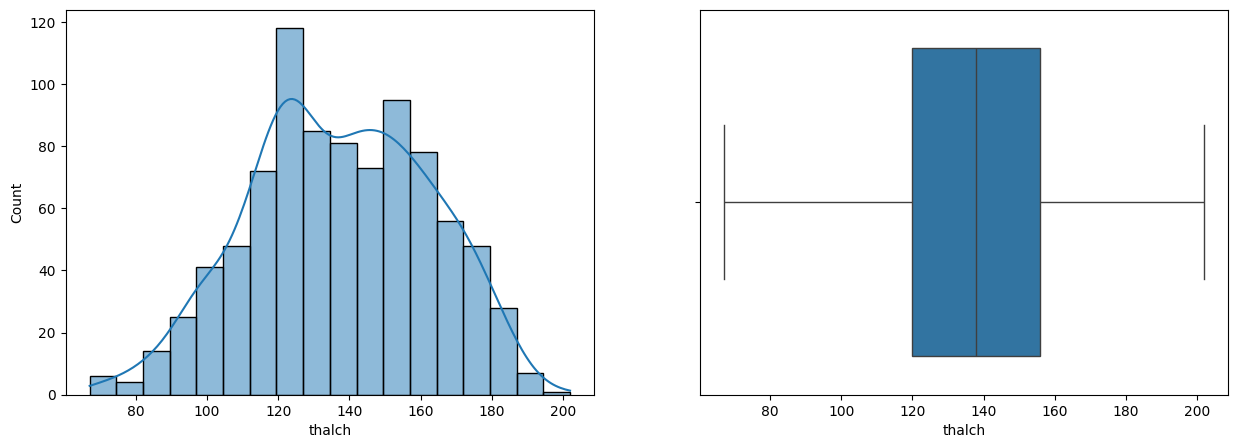

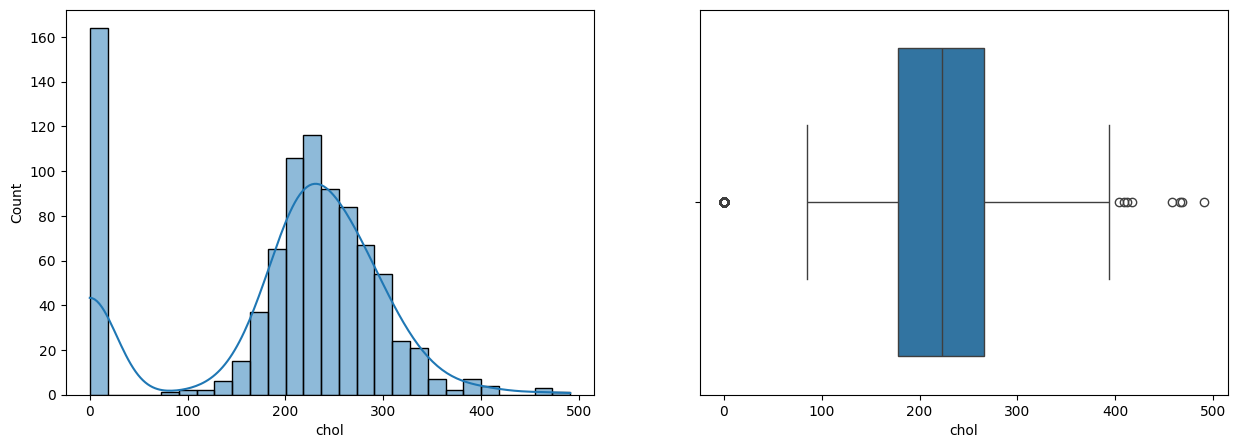

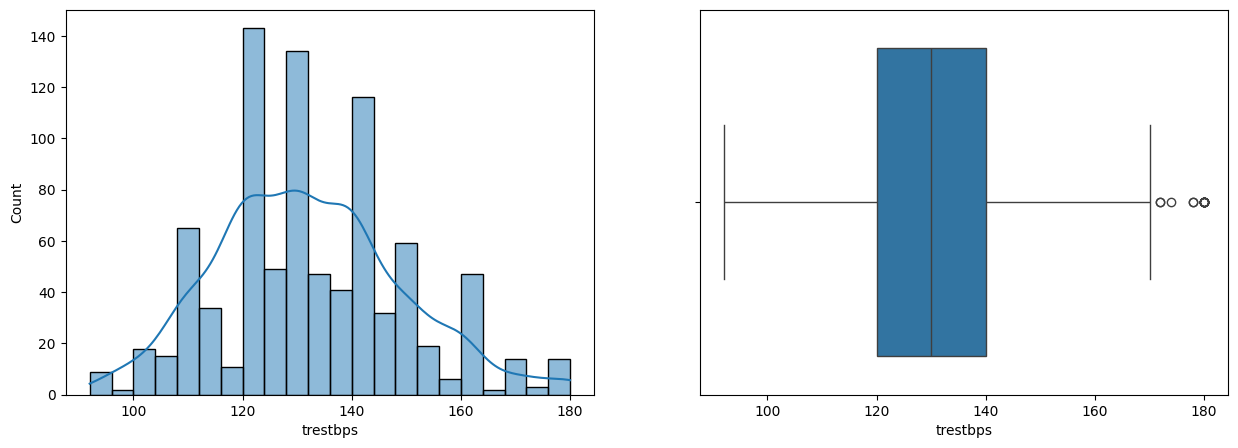

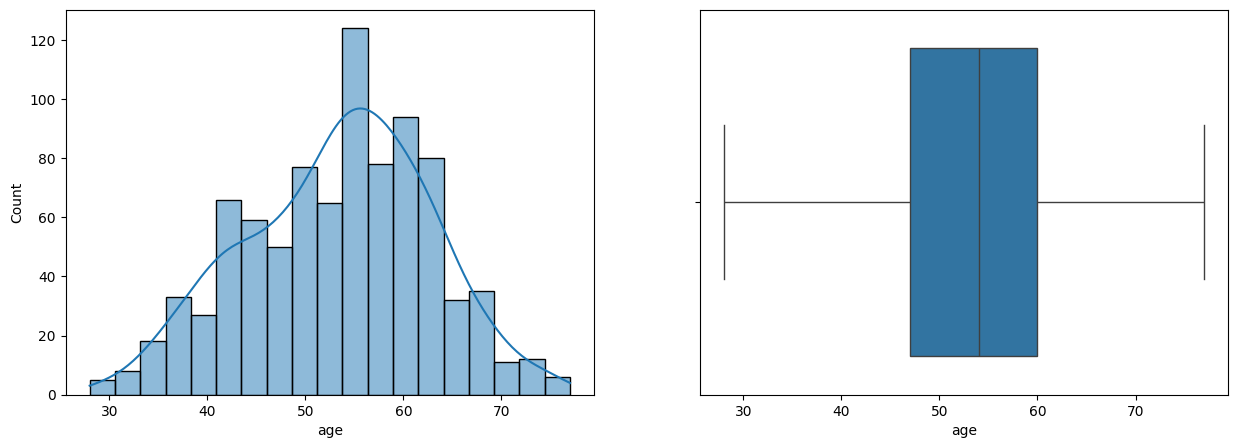

In [ ]:
# call  function for each numeric column
for col in numeric_cols:
    draw_histogram_and_boxplot(col)

6. Data Scaling & Encoding

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0


In [ ]:
columns_to_encode = ['thal', 'ca', 'dataset','slope', 'exang', 'restecg','fbs', 'cp', 'sex','num']

# Dictionary to store LabelEncoders for each column
label_encoders = {}
# Loop to apply LabelEncoder to each column
for col in columns_to_encode:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()

    # Fit and transform the data, then inverse transform it
    df[col] = le.fit_transform(df[col])

    # Store the encoder in the dictionary
    label_encoders[col] = le

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0
5,6,56,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,1,0


Data scaling using MinMaxScaler
we will scale the numeric columns using MinMaxScaler.

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0,0,0,0
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1,2,2,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0,0,1,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,1,0
5,6,56,1,0,1,120.0,236.0,0,1,178.0,0,0.8,2,0,1,0


In [ ]:
#  Scaling:

columns_to_scale = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']
min_max_scalers = {}

for col in columns_to_scale:
    # Create a new MinMaxScaler for the column
    scaler = MinMaxScaler()

    # Fit and transform the data
    df[col] = scaler.fit_transform(df[[col]])

    # Store the scaler in the dictionary
    min_max_scalers[col] = scaler

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,0.714286,1,0,3,0.602273,0.474542,1,0,0.614815,0,0.716667,0,0,0,0
2,3,0.795918,1,0,0,0.318182,0.466395,0,0,0.459259,1,0.766667,1,2,2,1
3,4,0.183673,1,0,2,0.431818,0.509165,0,1,0.888889,0,0.916667,0,0,1,0
4,5,0.265306,0,0,1,0.431818,0.415479,0,0,0.777778,0,0.566667,2,0,1,0
5,6,0.571429,1,0,1,0.318182,0.480652,0,1,0.822222,0,0.466667,2,0,1,0


7. Prediction using ML models

Machine Learning Models
We will use the following machine learning models to predict the heart disease:

Logistic Regression
Random Forest Classifier
Decision Tree Classifier
K-Nearest Neighbors Classifier
Support Vector Classifier
Gradient Boosting Classifier
XGBoost Classifier
LightGBM Classifier
CatBoost Classifier
Extra Trees Classifier
AdaBoost Classifier
Bagging Classifier
Stacking Classifier

In [ ]:
# # split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

X_train ,X_test ,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [ ]:


# Function to find best model and store accuracies
def find_best_model(X, y, X_test, y_test):
    global y_pred, best_model_name, results, results_df

    np.random.seed(42)
    models = {
        'LogisticRegression': (LogisticRegression(random_state=42), {}),
        'DecisionTreeClassifier': (DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'splitter': ['best', 'random']}),
        'RandomForestClassifier': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
        'KNeighborsClassifier': (KNeighborsClassifier(), {'n_neighbors': np.arange(3, 100, 2), 'weights': ['uniform', 'distance']}),
        'GradientBoostingClassifier': (GradientBoostingClassifier(random_state=42), {'n_estimators': [10, 100, 1000]}),
        'XGBClassifier': (XGBClassifier(random_state=42), {'n_estimators': [10, 100, 1000], 'learning_rate': [0.1, 0.01, 0.001]}),
        'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}),
        'GaussianNB': (GaussianNB(), {}),
    }

    best_model_name = None
    best_accuracy = 0.0
    results = []  # Store accuracy and model names
    model_accuracies = {}  # For plotting

    for name, (model, params) in models.items():
        try:
            grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
            grid_search.fit(X, y)

            y_pred = grid_search.best_estimator_.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            print("Model:", name)
            print("Cross-validation Accuracy:", grid_search.best_score_)
            print("Test Accuracy:", accuracy)
            print(classification_report(y_test, y_pred))

            print("\n_________________________________________________________________________________\n")

            # Save result
            results.append((name, accuracy))
            model_accuracies[name] = accuracy

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model_name = name
        except Exception as e:
            print(f"Error for model {name}: {e}")

    print("Best Model:", best_model_name)
    print('Test Accuracy of the Best Model:', (best_accuracy)*100)

    # Plotting accuracies
    plt.figure(figsize=(10, 6))
    plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
    plt.ylabel('Accuracy')
    plt.xlabel('Model')
    plt.title('Model vs Accuracy on Test Data')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
        # 'AdaBoostClassifier': (AdaBoostClassifier(random_state=42), {'estimators' : [KNeighborsClassifier(),GaussianNB()], 'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}),


Model: LogisticRegression
Cross-validation Accuracy: 0.5784090909090909
Test Accuracy: 0.6590909090909091
              precision    recall  f1-score   support

           0       0.76      0.88      0.81       128
           1       0.56      0.55      0.55        75
           2       0.53      0.27      0.36        33
           3       0.44      0.50      0.47        24
           4       0.00      0.00      0.00         4

    accuracy                           0.66       264
   macro avg       0.46      0.44      0.44       264
weighted avg       0.64      0.66      0.64       264


_________________________________________________________________________________

Model: DecisionTreeClassifier
Cross-validation Accuracy: 0.5386363636363637
Test Accuracy: 0.7045454545454546
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       128
           1       0.58      0.75      0.65        75
           2       0.47      0.21      0.29     

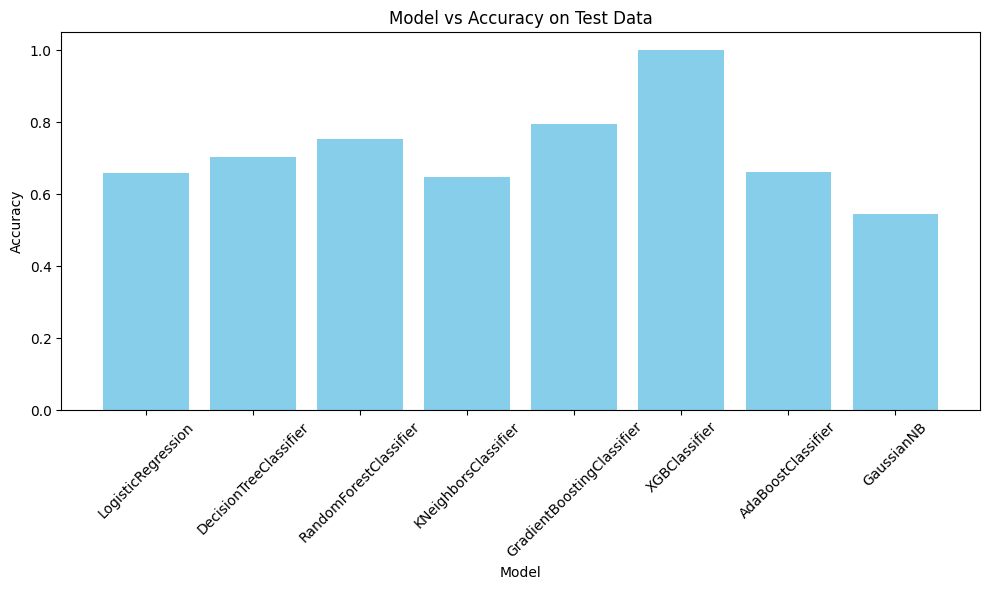

CPU times: user 4min 12s, sys: 2.11 s, total: 4min 14s
Wall time: 3min 29s


In [ ]:
%%time
# using the function:
find_best_model(X, y, X_test, y_test)

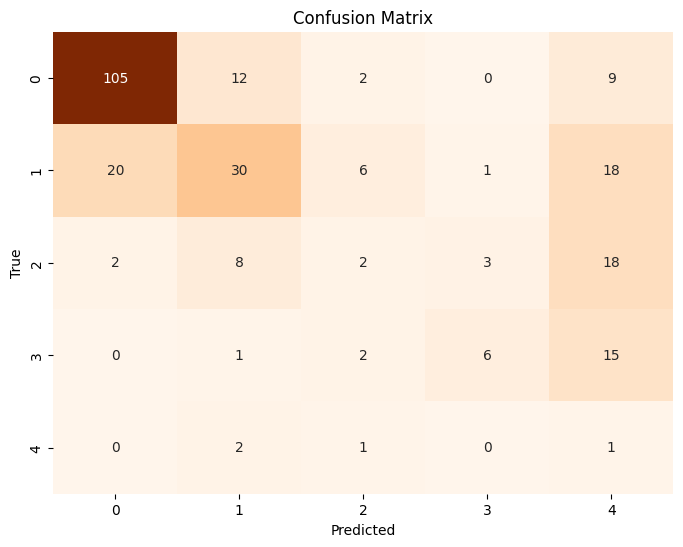

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()